在上面的例子中，数据存储为多维Numpy数组，也称为张量（tensor）。当前流行的机器学习系统都以张量作为基本数据结构。所以Google的TensorFlow也拿张量命名。那张量是什么呢？
张量是数据的容器（container）。这里的数据一般是数值型数据，所以是数字的容器。大家所熟悉的矩阵是二维（2D）张量。张量是广义的矩阵，它的某一维也称为轴（axis）。

### 标量（Scalar，0D 张量）
只包含一个数字的张量称为标量（或者数量张量，零维张量，0D张量）。在Numpy中，一个float32或者float64位的数值称为数量张量。Numpy张量可用其ndim属性显示轴的序数，数量张量有0个轴（ndim == 0）。张量的轴的序数也称为阶（rank）。下面是Numpy标量：

In [1]:
import numpy as np
x = np.array(12)
x

array(12)

In [2]:
x.ndim

0

### 向量（1D张量）
数字的数组也称为向量，或者一维张量（1D张量）。一维张量只有一个轴。

In [3]:
x = np.array([12, 3, 6, 14])
x

array([12,  3,  6, 14])

In [4]:
x.ndim

1

该向量有5项，也称为5维的向量。但是不要混淆5D向量和5D张量！一个5D向量只有一个轴，以及沿该轴有5个维数（元素）；然而一个5D张量有5个轴，并且沿每个轴可以有任意个的维数。维度既能表示沿某个轴的项的数量（比如，上面的5D向量），又能表示一个张量中轴的数量（比如，上面的5D张量），时常容易混淆。对于后者，用更准确地技术术语来讲，应该称为5阶张量（张量的阶即是轴的数量），但人们更常用的表示方式是5D张量。

### 矩阵（2D张量）
向量的数组称为矩阵，或者二维张量（2D张量）。矩阵有两个轴，也常称为行和列。你可以将数字排成的矩形网格看成矩阵，下面是一个Numpy矩阵：

In [5]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

沿着第一个轴的项称为行，沿着第二个轴的项称为列。上面的例子中，[5, 78, 2, 34, 0]是矩阵 x 第一行，[5, 6, 7]是第一列。

矩阵的数组称为三维张量（3D张量），你可以将其看成是数字排列成的立方体，下面是一个Numpy三维张量(注意该三维张量内部的三个二维张量的shape一致，均为（3，5）。维度是一个自然数，形状则是一个元组):

In [6]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
               [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
               [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

题外话！若张量某维度的元素未对其，则这些元素成为list。

In [7]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
               [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
               [[5, 78, 2, 34, 0],
               [7, 80, 4, 36, 2]]])
x

array([list([[5, 78, 2, 34, 0], [6, 79, 3, 35, 1], [7, 80, 4, 36, 2]]),
       list([[5, 78, 2, 34, 0], [6, 79, 3, 35, 1], [7, 80, 4, 36, 2]]),
       list([[5, 78, 2, 34, 0], [7, 80, 4, 36, 2]])], dtype=object)

In [8]:
x.ndim

1

同理，将三维张量放进数组可以创建四维张量，其它更高维的张量亦是如此。深度学习中常用的张量是 0D 到 4D。如果处理视频数据，你会用到5D。

### 关键属性
张量具有如下三个关键属性：
1. 轴的数量（阶数，rank）：一个三维张量有3个轴，矩阵有2个轴。Python Numpy中的张量维度为ndim。
2. 形状（shape）：它是一个整数元组，描述张量沿每个轴有多少维。例如，前面的例子中，矩阵的形状为（3，5），三维张量的形状为（3，3，5）。向量的形状只有一个元素，比如（5，），标量则是空形状，（）。
3. 数据类型：张量中包含的数据类型有float32，unit8，float64等等，调用Python的dtype属性获取。字符型张量是极少见的。注意，Numpy中不存在字符串张量，其它大部分库也不存在。因为张量存在于预先申请的、连续的内存分段；而字符是变长的。

下面来几个具体的例子，回看MNIST数据集。首先加载MNIST数据集：

In [9]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

e:\program_files\miniconda3\envs\dl\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


接着，用ndim属性显示张量train_images的轴数量：

In [10]:
print(train_images.ndim)

3


打印形状：

In [11]:
print(train_images.shape)

(60000, 28, 28)


使用dtype属性打印数据类型：

In [12]:
print(train_images.dtype)

uint8


所以train_images是一个8-bit 整数的三维张量。更确切地说，它是一个包含60,000个矩阵的数组，其中每个矩阵是28 x 8 的整数。每个矩阵是一个灰度图，其值为0到255。
下面使用Python Matplotlib库显示三维张量中的第四幅数字图，见图2.2：   

In [13]:
#Listing 2.6 Dispalying the fourth digit
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

<Figure size 640x480 with 1 Axes>

注：这里使用 matplotlib.cm, cm 表示 colormap。   
binary map：https://en.wikipedia.org/wiki/Binary_image

digit 是从这个三维张量取出的一个矩阵（二维数组/张量）：

In [14]:
print(digit.ndim,",",digit.shape)

2 , (28, 28)


### Numpy中的张量操作
上面的例子中，使用了train_images[i]沿第一个轴选择指定的数字图。选择张量的指定元素称为张量分片（tensor slicing），下面看Numpy数组中的张量切片操作：   
选择#10到#100（不包括#100）的数字图，对应的张量形状为（90，28，28）：

In [15]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


其等效的表示方法有，沿每个轴为张量分片指定起始索引和终止索引。注意，“:”等效于选择整个轴的数据：

In [16]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

一般，你可以沿着张量每个轴任意选择两个索引之间的元素。例如，选择所有图片的右下角的14 x 14的像素：

In [17]:
my_slice = train_images[:, 14:, 14:]

你也可以用负索引。就像Python list中的负索引一样，它表示相对于当前轴末端的位置。剪切图片中间14 x 14像素，使用如下的方法：

In [18]:
my_slice = train_images[:, 7:-7, 7:-7]

### 数据批(data batch)的概念
总的来说，你在深度学习中即将接触的所有数据张量的第一轴（axis 0，since indexing starts at 0）就叫“样本轴”（samples axis，也叫“样本维”）。简单地说，MINIST例子中的“样本（samples）”就是那些数字图片。   
另外，深度学习模型不会一次处理整个数据集，而是将数据集分解为若干个小批次。具体来讲，下面就是MNIST数据集中一个大小为128的批次。

In [21]:
# Listing 2.23 Slicing a tensor into batches
batch = train_images[:128]

# and here's the next batch
batch = train_images[128:256]

# and the n-th batch:
#batch = train_images[128 * n: 128 * (n + 1)]
batch.shape

(128, 28, 28)

考虑这样一个批张量，第一轴（axis 0）就称为“批次轴”（batch axis）或“批次维数”（batch dimension）。这是一个术语，当你使用Keras或其他深度学习库时你会经常接触到。

### 现实中data tensors的例子
让我们让数据张量更具体，还有一些类似于你稍后会遇到的例子。   
你将操作的数据几乎总是属于下列类别之一：
1. 向量数据：2D 张量，shape 为（samples，features）
2. 时间序列数据或序列数据：3D 张量，shape 为（samples，timesteps，features）
3. 图像： 4D 张量，shape 为（samples，width，height，channels）或者（samples，channels，width，height）
4. 视频：5D 张量，shape 为（samples，frames，width，height，channels）或者（samples，frames，channels，width，height）

### 向量数据


### 时间序列数据或序列数据
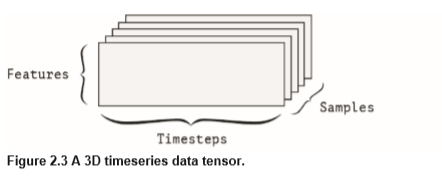

### 图像

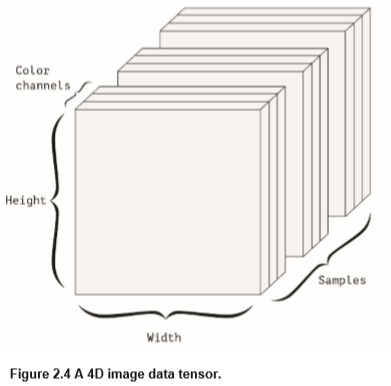

### 视频

###  The gears of neural networks: tensor operations

就像计算机程序可以最终被降阶为一系列对二值输入的二值操作一样，深度神经网络中的所有变换可以被降阶至一系列对数值数据张量的“张量操作”。例如，可以对张量实施add，multiply等操作。   
在我们最开始的例子中，我们通过逐个地堆叠 Dense 层搭建了神经网络。一个神经网络层看起来是这样的：

In [23]:
#Listing 2.24 A Keras layer
#keras.layers.Dense(512, activation='relu')

 这个神经网络层，可以用一个函数（function）来解释，这个函数输入一个2D张量，并返回另一个2D张量，这个张量是对输入张量的新描述。具体地，该方程为：
 
 让我们来分解它。这个方程里面有三个张量操作：输入张量和W张量的点乘（dot），得到的2D张量和向量b的加（+）操作，最后是一个relu操作。rulu(x) 就是简单的 max（x,0）。   
 虽然这些操作完全是线性代数计算，但你会发现这里没有任何数学符号。因为我们发现当没有相应数学背景的编程人员使用Python语句而不是数学方程式时，他们更能够掌握。所以这里我们一直使用Numpy代码。

### Element-wise operations
“relu”操作和加法操作都是element-wise操作（独立地对张量的每一个元素实施计算）。这意味着这些操作对大量并行运算是非常适合的（这类操作也叫“vectorized” implementations，向量化运算。）。如果你要写一个element-wise 操作的朴素Python实现，你将使用到for循环：

In [24]:
#Listing 2.25 A naive implemetation of an element-wise "relu" operation
def naive_relu(x):
    # x is a 2D Numpy tensor
    assert len(x.shape) == 2
    
    x = x.copy()   # Avoid overwrinting the input tensor
    for i in range(x.shape[0]:
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

同样的，对于加法操作有：

In [25]:
#Listing 2.26 A naive implementation of element-wise addition
def naive_add(x, y):
    # x and y are 2D Numpy tensors
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()   # Avoid overwriting the input tensor
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, h]
    return x

使用相同的方法，我们可以实现element-wise multiplication，subtraction等运算。    
In practice, when dealing with Numpy arrays, these operations are available as well-optimized built-in Numpy functions, which themselves delegate the heavy lifting to a BLAS implementation (Basic Linear Algebra Subprograms) if you have one installed, which you should. BLAS are low-level, highly-parallel, efficient tensor manipulation routines typically implemented in Fortran or C.    
所以在Numpy中你可以这样实施element-wise，速度非常快。

In [ ]:
# Listing 2.27 Naive element-wise operation in Numpy
import numpy as np
# Element-wise addtion
#z = x + y

# Element-wise relu
#z = np.maximum(z, 0.)

### Broadcasting

In our naive implementation of  above, we only support the addition of 2D naive_add tensors with identical shapes. But in the  layer introduced earlier, we were adding a Dense 2D tensor with a vector. What happens with addition when the shape of the two tensors being added differ?   
When possible and if there is no ambiguity, the smaller tensor will be "broadcasted" to match the shape of the larger tensor. Broadcasting consists in two steps:    
1. 维度小的张量添加一个轴，以和维度大的张量的维度（ndim）适配（该操作为 broadcast axes）
2. 维度小的张量沿着新轴拷贝，以和维度大的张量的形状（shape）适配。   
让我们来看一个具体的例子：考虑shape为（32，10）的张量x，和shape为（10，）的张量y。   
首先，首先我们给y张量添加一个第一轴，这时y的shape变成（1，10）。接着沿着新轴重复y 32次，得到shape为（32，10）的张量Y。即：

In [26]:
# Y[i,:] = y for i in range(0, 32)

In terms of implementation, no new 2D tensor would actually be created since that would be terribly inefficient, so the repetition operation would be entirely virtual, i.e. it would be happening at the algorithmic level rather than at the memory level. But thinking of the vector being repeated 10 times alongside a new axis is a helpful mental model. Here’s what a naive implementation would look like:

In [27]:
def naive_add_matrix_and_vector(x, y):
    # x is a 2D Numpy tensor
    # y is a Numpy vector
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[10] == y.shape[0]
    
    x = x.copy()   # Avoid overwriting the input tensor
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

With broadcasting, you can generally apply two-tensor element-wise operations if one tensor has shape  and the other has shape (a, b, … n, n + 1, … m) and the other has shpae (n, n + 1, ... m). The broadcasting would then automatically happen for axes  a to n -1.     
You can thus do:
（注意下面这里扩展的轴的维度为2，而不是1！）

In [28]:
### Listing 2.29 Applying the element-wise operation to two tensors of maximum different shapes via broadcastin
import numpy as np

# x is a random tensor with shape (64, 3, 32, 10) 
x = np.random.random((64, 3, 32, 10)) 
# y is a random tensor with shape (32, 10) 
y = np.random.random((32, 10))
# The output z has shape (64, 3, 32, 10) like x 
z = np.maximum(x, y)

### Tensor dot
dot操作, 也叫张量乘法（tensor product），不要将其和element-wise混淆。它是张量运算中最常见和最重要的。 与element-wise相反，它将输入张量中的元素组合在一起（组合有权重）。   

Element-wise product is done with the * operator in Numpy, Keras, Theano and TensorFlow. uses a different syntax in TensorFlow, but in both Numpy and Keras it dot is done using the standard  operator:

In [30]:
# Listing 2.30 Numpy  operations between two tensors
import numpy as np
#z = np.dot(x, y)

In mathematical notation, you would note the operation with a dot . :   
z = x . y     
Mathematically, what does the dot operation do? Let’s start with the dot product of two vectors x and y. It is computed as such:


In [31]:
# Listing 2.31 A naive implementation of dot
def naive_vector_dot(x, y):    
    # x and y are Numpy vectors    
    assert len(x.shape) == 1    
    assert len(y.shape) == 1    
    assert x.shape[0] == y.shape[0]
    
    z = 0.    
    for i in range(x.shape[0]):        
        z += x[i] * y[i]    
    return z

You will have noticed that the dot product between two vectors is a scalar, and that only vectors with the same number of elements are compatible for dot product.    
You can also take the dot product between a matrix x and a vector y, which returns a vector where coefficients are the dot products between y and the rows of x. You would implement it as such

In [33]:
# Listing 2.32 A naive implementation of matrix-vector dot
import numpy as np
def naive_matrix_vector_dot(x, y):
    # x is a Numpy matrix    
    # y is a Numpy vector    
    assert len(x.shape) == 2    
    assert len(y.shape) == 1    
    # The 1st dimension of x must be    
    # the same as the 0th dimension of y!    
    assert x.shape[1] == y.shape[0]
    
    # This operation returns a vector of 0s    
    # with the same shape as y    
    z = np.zeros(x.shape[0])    
    for i in range(x.shape[0]):        
        for j in range(x.shape[1]):            
            z[i] += x[i, j] * y[j]    
        return z  

You could also be reusing the code we wrote previously, which highlights the relationship between matrix-vector product and vector product:

In [35]:
# Listing 2.33 Alternative naive implementation of matrix-vector dot
def naive_matrix_vector_dot(x, y):    
    z = np.zeros(x.shape[0])    
    for i in range(x.shape[0]):        
        z[i] = naive_vector_dot(x[i, :], y)    
    return z

Note that as soon as one of the two tensors has a  higher than 1,  is no longer ndim dot symmetric, which is to say that  is not the same as . dot(x, y) dot(y, x) Of course, dot product generalizes to tensors with arbitrary number of axes. The most common applications may be the dot product between two matrices. You can take the dot product of two matrices x and y (dot(x, y)) if and only if  x.shape[1] == y.shape[0]. The result is a matrix with shape (x.shape[0], y.shape[1]) , where coefficients are the vector products between the rows of x and the columns of y. Here’s the naive implementation:

In [36]:
# Listing 2.34 A naive implementation of matrix-matrix dot
def naive_matrix_dot(x, y):    
    # x and y are Numpy matrices    
    assert len(x.shape) == 2    
    assert len(y.shape) == 2    
    # The 1st dimension of x must be    
    # the same as the 0th dimension of y!    
    assert x.shape[1] == y.shape[0]
    # This operation returns a matrix of 0s    
    # with a specific shape    
    z = np.zeros((x.shape[0], y.shape[1]))    
    # We iterate over the rows of x    
    for i in range(x.shape[0]):        
        # And over the columns of y        
        for j in range(y.shape[1]):            
            row_x = x[i, :]            
            column_y = y[:, j]            
            z[i, j] = naive_vector_dot(row_x, column_y)    
    return z

To understand dot product shape compatibility, it helps to visualize the input and output tensors by aligning them in the following way:
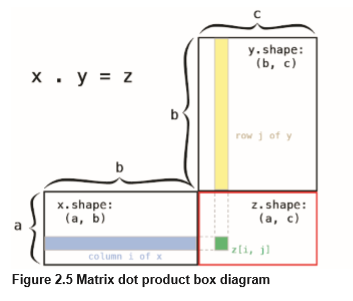

x, y and z are pictured as rectangles (literal boxes of coefficients). Because the rows and x and the columns of y must have the same size, it follows that the width of x must match the height of y. If you go on to develop new machine learning algorithms, you will likely be drawing such diagrams a lot.     
More generally, you can take the dot product between higher-dimensional tensors, following the same rules for shape compatibility as outlined above for the 2D case:下面这个操作在线性代数的矩阵乘法中还没有接触过，这已经超过矩阵的维度（二维）。     
(a, b, c, d) . (d,)  (a, b, c)     
(a, b, c, d) . (d, e)  (a, b, c, e)

### Tensor reshaping
第三类非常需要理解的张量运算是“tensor reshaping”. 
虽然我们的第一个神经网络的例子的第一层中并没用用到该操作，但是在另一个Dense中，我们在将数据喂入网络前的数字数据预处理（pre-proccessed）上使用了reshape。

In [38]:
# Listing 2.35 MNIST image tensor reshaping
#train_images = train_images.reshape((60000, 28 * 28)

Reshaping a tensor means re-arranging its rows and columns so as to match a target shape. Naturally the reshaped tensor will have the same total number of coefficients as the initial tensor. Reshaping is best understood via simple examples:
对一个张量的reshape意味着重新调整张量的行和列，以适配目标shape。所以reshape后地张量和原始的张量自然而然地拥有着相同总数的参数。reshpe可以通过下面的例子很好地理解：

In [40]:
# Listing 2.36 Tensor reshaping example
x = np.array([[0., 1.],                 
              [2., 3.],                 
              [4., 5.]]) 
print(x.shape)

(3, 2)


In [42]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [43]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

A special case of reshaping that is commonly encountered is the transposition. "Transposing" a matrix means exchanging its rows and its columns, so that x[i, :] becomes :

In [44]:
# Listing 2.37 Matrix transposition
x = np.zeros((300, 20))  
# Creates an all-zeros matrix of shape (300, 20) 
x = np.transpose(x) 
print(x.shape)

(20, 300)


### Geometric interpretation of tensor operations
Because the contents of the tensors being manipulated by tensor operations can be interpreted as being coordinates of points in some geometric space, all tensor operations have a geometric interpretation    
For instance, let’s consider addition. We will start from the following vector:   
A = [0.5, 1.0]    
It is a point in a 2D space:    
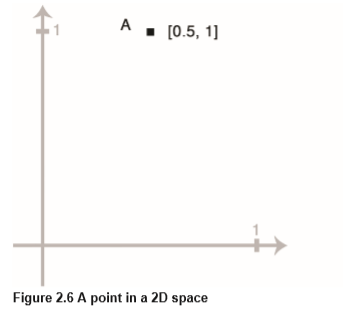    

It is common to picture a vector as an arrow linking the origin to the point:   
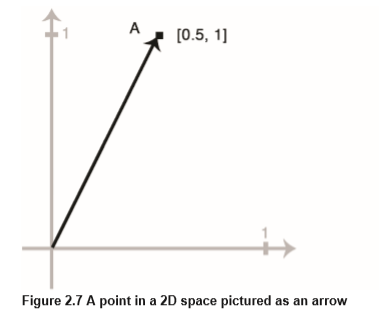   

Let’s consider a new point, , which we will add to the previous one. B = [1, 0.25] This is done geometrically by simply chaining together the vector arrows, with the resulting location being the vector representing the sum of the previous two vectors:    
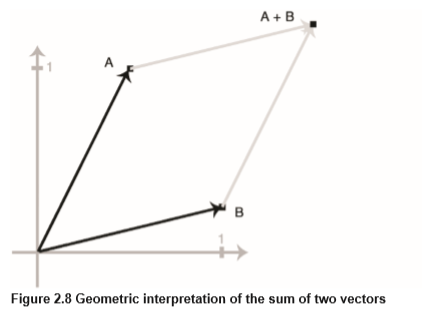
In general, elementary geometric operations such as affine transformations, rotations, scaling, etc. can be expressed as tensor operations. For instance, a rotation of a 2D vector by an angle theta can be achieved via dot product with a 2x2 matrix  where R = [u, v] u and  and both vectors of the plane:    
u = [cos(theta), sin(theta)] and v = [-sin(theta), cos(theta)].

###  A geometric interpretation of deep learning
You just learned that neural networks consist entirely in chains of tensors operations, and that all these tensor operations are really just geometric transformations of the input data. It follows that you can interpret a neural network as a very complex geometric transformation in a high-dimensional space, implemented via a long series of simple steps.    
In 3D, the following mental image may prove useful: imagine two sheets of colored paper, a red one and a blue one. Superpose them. Now crumple them together into a small paper ball. That crumpled paper ball is your input data, and each sheet of paper is a class of data in a classification problem. What a neural network (or any other machine learning model) is meant to do, is to figure out a transformation (计算出一个变换) of the paper ball that would uncrumple it, so as to make the two classes cleanly separable again. With deep learning, this would be implemented as a series of simple transformations of the 3D space, such as those you could apply on the paper ball with your fingers, one movement at a time.    
Uncrumpling paper balls is what all machine learning is about: finding neat representations for complex, highly folded data manifolds. At this point, you should already have a pretty good intuition as to why deep learning excels at it: it takes the approach of incrementally decomposing a very complicated geometric transformation into a long chain of elementary ones, which is pretty much the strategy a human would follow to uncrumple a paper ball. Each layer in a deep network applies a transformation that disentangle the data a little bit—and a deep stack of layers makes tractable an extremely complicated disentanglement process.